In [1]:
import camb
import numpy as np
import scipy.integrate as si
from camb import get_matter_power_interpolator
from colossus.cosmology import cosmology as col_cosmology
from colossus.lss import bias, mass_function

import limpy.cosmos as cosmos
import limpy.lines as ll

<---Parameters used in cosmo.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3111


In [2]:
line_name = "CII158"
model_name="Silva15-m1"
sfr_model="Behroozi19"

line_models=ll.line_modeling(line_name = line_name, model_name= model_name,
                 sfr_model=sfr_model, parameters={'use_scatter':True})

In [3]:
mh=np.logspace(10,13, num=500)
z= 7

lc1=line_models.line_luminosity(mh, z)
lc2=line_models.line_luminosity(mh, z)
lc3=line_models.line_luminosity(mh, z)

In [4]:
line_models_ns=ll.line_modeling(line_name = line_name, model_name= model_name,
                 sfr_model=sfr_model, parameters={'use_scatter':False})

lc4=line_models_ns.line_luminosity(mh, z)

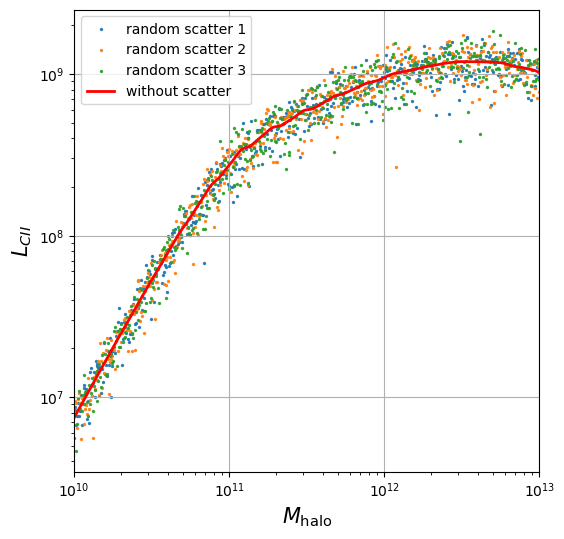

In [5]:
# Plotting
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 6))

s = 2
plt.scatter(mh, lc1, label='random scatter 1', s=s, alpha=0.9)
plt.scatter(mh, lc2, label='random scatter 2', s=s, alpha=0.9)
plt.scatter(mh, lc3, label='random scatter 3', s=s, alpha=0.9)

plt.plot(mh, lc4, lw=2, color="r", label="without scatter")

plt.xscale('log')
plt.yscale('log')

plt.xlim(1e10, 1e13)

plt.xlabel(r'$M_{\rm halo}$')
plt.ylabel(r'$L_{CII}$')
plt.legend()
plt.grid(True)


plt.savefig("lim_scatter.pdf", bbox_inches="tight")

In [6]:
# Check power spectrum

In [18]:
k= np.logspace(-2,1)
z=2
lim_theory= ll.theory(parameters={'use_scatter':True, "a_std": 2, "b_std": 1})

lim_theory_ns= ll.theory(parameters={'use_scatter':False, "a_std": 2,  "b_std": 1})

<---Parameters used in cosmo.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3111
<--- Parameters used in lines.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3111
<---Parameters used in cosmo.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3111
<--- Parameters used in lines.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3111


In [19]:
pk1= lim_theory.Pk_line(k, z)
pk2= lim_theory.Pk_line(k, z)
pk3= lim_theory.Pk_line(k, z)
pk4= lim_theory_ns.Pk_line(k, z)

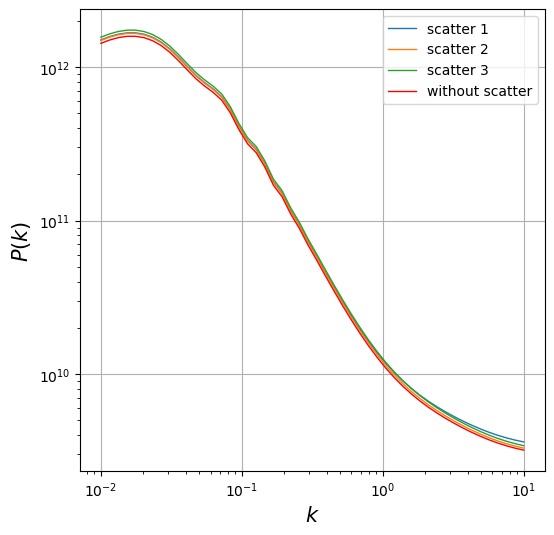

In [25]:
# Plotting
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 6))


plt.plot(k, pk1, lw=1,  label="scatter 1")
plt.plot(k, pk2, lw=1,  label="scatter 2")
plt.plot(k, pk3, lw=1,  label="scatter 3")

plt.plot(k, pk4, lw=1, color="r", label="without scatter")

plt.yscale('log')
plt.xscale('log')



plt.ylabel(r'$P(k)$')
plt.xlabel(r'$k$')
plt.legend()
plt.grid(True)


plt.savefig("lim_scatter.pdf", bbox_inches="tight")

# check cosmology

In [37]:
k= np.logspace(-2,1)
z=2

plt.figure(figsize=(6, 6))

h =[0.5,0.6, 0.7, 0.8]


pk1 = ll.theory(parameters={'omega_m': 0.2}).Pk_line(k, z)
pk2 = ll.theory(parameters={'omega_m': 0.3}).Pk_line(k, z)
pk3 = ll.theory(parameters={'omega_m': 0.4}).Pk_line(k, z)


    


<---Parameters used in cosmo.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.2
<--- Parameters used in lines.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.2
<---Parameters used in cosmo.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3
<--- Parameters used in lines.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3
<---Parameters used in cosmo.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.4
<--- Parameters used in lines.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.4


<Figure size 600x600 with 0 Axes>

array([-6.69098994e+11, -7.79312279e+11, -8.96432093e+11, -1.01669167e+12,
       -1.13428779e+12, -1.24100141e+12, -1.32615939e+12, -1.37765484e+12,
       -1.38479024e+12, -1.34293952e+12, -1.25830267e+12, -1.14736418e+12,
       -1.03862505e+12, -9.50343111e+11, -8.84269631e+11, -8.05233991e+11,
       -6.80934480e+11, -5.49290572e+11, -4.73723913e+11, -4.18598411e+11,
       -3.31072471e+11, -2.74168875e+11, -2.27441867e+11, -1.81845480e+11,
       -1.48181859e+11, -1.19622065e+11, -9.63529032e+10, -7.79526813e+10,
       -6.32464543e+10, -5.15647284e+10, -4.23142892e+10, -3.49939640e+10,
       -2.91889827e+10, -2.45631301e+10, -2.08477700e+10, -1.78283169e+10,
       -1.53371702e+10, -1.32446914e+10, -1.14551180e+10, -9.89996158e+09,
       -8.53268824e+09, -7.32618343e+09, -6.26611726e+09, -5.34500899e+09,
       -4.55682723e+09, -3.89448020e+09, -3.34787952e+09, -2.90440761e+09,
       -2.55007138e+09, -2.27072998e+09])

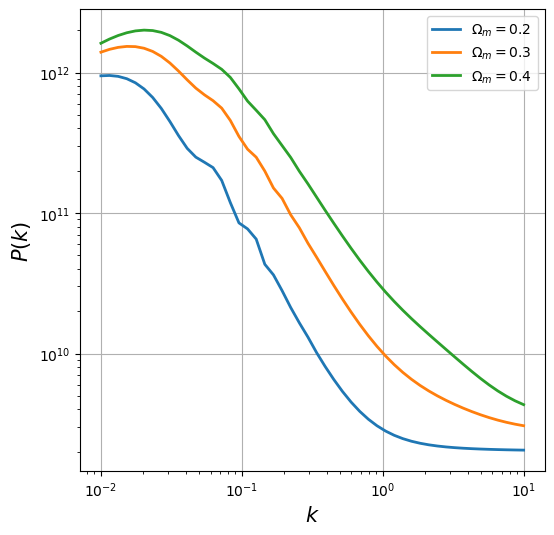

In [41]:
# Plotting
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 6))


plt.plot(k, pk1, lw=2,  label=r"$\Omega_m = 0.2$")
plt.plot(k, pk2, lw=2,  label=r"$\Omega_m = 0.3$")
plt.plot(k, pk3, lw=2,  label=r"$\Omega_m = 0.4$")


plt.yscale('log')
plt.xscale('log')



plt.ylabel(r'$P(k)$')
plt.xlabel(r'$k$')
plt.legend()
plt.grid(True)


plt.savefig("lim_scatter.pdf", bbox_inches="tight")

In [67]:
z=4

b1 = ll.theory(parameters={"use_scatter": True}).b_line(z)
b2 = ll.theory(parameters={"use_scatter": True}).b_line( z)
b3 = ll.theory(parameters={"use_scatter": True}).b_line( z)

<---Parameters used in cosmo.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3111
<--- Parameters used in lines.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3111
<---Parameters used in cosmo.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3111
<--- Parameters used in lines.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3111
<---Parameters used in cosmo.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3111
<--- Parameters used in lines.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3111


In [71]:
b1

2.922747117249655

In [72]:
b2

2.91555205021663

In [73]:
b3

2.9522080585893073